# 6.3 Cary Geographic Visualization

## Contents:

01. Install Libraries
02. Import Libraries
03. Import Datasets
04. Wrangling & Further Data Cleaning
    - Remove unnecessary columns
    - Change Variable Types
    - Duplicate Check
    - Explore extreme values & outliers
    - Remove Rows
05. Plotting Choropleth
06. Export Cleaned & Wrangled Dataset

# 01. Install Libraries

In [2]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


# 02. Import Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import geopandas as gpd
from shapely import wkb
from geopy.geocoders import Nominatim
import time

# 03. Import Datasets

In [10]:
# Defines path as intro file path for Cary Real Estate project

path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis'

In [12]:
# Imports cary_cleaned dataset

df = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'cary_cleaned.parquet'))

In [14]:
# Import Geo shape file

zcta_path = r'/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis/01 Datasets/01 Original Data/tl_2024_us_zcta520.shp'

In [16]:
zcta_path

'/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis/01 Datasets/01 Original Data/tl_2024_us_zcta520.shp'

In [18]:
# Load the Shapefile into a GeoDataFrame

zcta_gdf = gpd.read_file(zcta_path) 

In [19]:
zcta_gdf.head()

,ZCTA5CE20,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,860Z200US47236,B5,G6350,S,1029063,0,+39.1517426,-085.7252769,"POLYGON ((-85.7341 39.15597, -85.72794 39.1561..."
1,47870,47870,860Z200US47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,860Z200US47851,B5,G6350,S,53326,0,+39.5735839,-087.2459559,"POLYGON ((-87.24769 39.5745, -87.24711 39.5744..."
3,47337,47337,860Z200US47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,860Z200US47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


In [22]:
# Set the display option to show all columns

pd.set_option('display.max_columns', None)

# 04. Wrangling & Further Data Cleaning

#### Notes:

Dataset had already been somewhat cleaned and formatted in exercise 6.1 notebook--unnecessary columns removed, capitalization was normalized, and datatype variables were changed. 

Additionally, 6.1 contained GeoShape variables--these columns were retained and used to create new Latitude & Longitude columns with the help of Shapely and visualized using Geopandas.

From 6.2, it was clear that there were some missing data & extreme outliers that will impact the study, which will be handled here.

In [26]:
# Get Overview of imported Dataset

df.head(5)

,owneradd1,owneradd2,owneradd3,location,calcacreage,deedacres,streetnumber,streetmisc,streetprefix,streetname,streettype,streetsuffix,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,cary_city,apaownership,apaactivity,apafunction,apastructure,apasite,billingclass,apaownershipdesc,apaactivitydesc,apafunctiondesc,apastructuredesc,apasitedesc,county,totalbldgsqft,typedecode,phycity,phyzip,utilities,shape_starea,shape_stlength,yearbuilt,chathamaddress,geo_shape,geo_point_2d,latitude,longitude
0,38 Saint Paul Ave,None,None,613 Hanson Rd,0.15,0.15,613,None,None,Hanson,RD,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#099 PL000161-000365,195234,40180,40180,None,235414,2017-10-27,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,2080,None,Durham,27713,None,6451.097435,336.681551,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00;\x87\xfc\xe6~\xbaS\xc09...,35.941222,-78.913996
1,2908 London Bell Dr,None,None,619 Hanson Rd,0.16,0.16,619,None,None,Hanson,RD,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#096 PL000161-000365,179487,40705,40705,None,220192,2023-12-05,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,1906,None,Durham,27713,None,7096.203754,354.824260,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00\xa3U\xce\xfat\xbaS\xc0\...,35.941139,-78.913390
2,1411 Carrickfergus Ct,None,None,1411 Carrickfergus Ct,0.22,0.22,1411,None,None,Carrickfergus,CT,None,Res 1 Family,NaN,NaN,OAKHAVEN/LT#15 PL000161-000075,275711,75937,75937,None,351648,NaT,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,3200,None,Durham,27713,None,9361.373133,405.469398,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x1d\x00...,b'\x01\x01\x00\x00\x00\xdf\\\xfe\x8d\xc3\xbbS\...,35.890914,-78.933811
3,4532 Shady Side Ln,None,None,4532 Shady Side Ln,0.13,0.13,4532,None,None,Shady Side,LN,None,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#069 PL000161-000365,203620,39480,39480,None,243100,NaT,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,2308,None,Durham,27713,None,5588.978748,310.423891,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00\x036\xbd\x00q\xbaS\xc0\...,35.940075,-78.913147
4,3608 Rambir Dr,None,None,3608 Ranbir Dr,0.28,0.28,3608,None,None,Ranbir,DR,None,Res 1 Family,NaN,NaN,LOCHSIDE/PH:01/LT#105 PL000165-000308,163464,57600,57600,None,221064,2013-06-27,None,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,Durham,1567,None,Durham,27713,None,12205.491128,453.505217,NaT,None,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00d\xc3\x03\x0f}\xb9S\xc0\...,35.928977,-78.898258


In [28]:
acres = df[(df['calcacreage'] > 1) & (df['deedacres'] == 0)]
acres

,owneradd1,owneradd2,owneradd3,location,calcacreage,deedacres,streetnumber,streetmisc,streetprefix,streetname,streettype,streetsuffix,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,cary_city,apaownership,apaactivity,apafunction,apastructure,apasite,billingclass,apaownershipdesc,apaactivitydesc,apafunctiondesc,apastructuredesc,apasitedesc,county,totalbldgsqft,typedecode,phycity,phyzip,utilities,shape_starea,shape_stlength,yearbuilt,chathamaddress,geo_shape,geo_point_2d,latitude,longitude


In [30]:
# Check for missing values

df.isna().sum()

owneradd1               88
owneradd2            71882
owneradd3           284630
location                 0
calcacreage          13507
deedacres                0
streetnumber         13507
streetmisc          290487
streetprefix        285050
streetname           13507
streettype           14806
streetsuffix        294129
landclass            13605
totalstructures      76773
totalunits           76773
propertydesc            25
bldgvalue             2301
landvalue             2301
landsalevalue        15747
landsaledate        207086
totalsalevalue        2374
totalsaledate        77286
cary_city           113310
apaownership         76773
apaactivity          76773
apafunction          76773
apastructure         76773
apasite              76773
billingclass         76773
apaownershipdesc     77025
apaactivitydesc      76920
apafunctiondesc      76906
apastructuredesc     77228
apasitedesc          76781
county                   0
totalbldgsqft        51761
typedecode          101624
p

## Remove Columns

Though several columns were already removed in the first exercise, after further review quantity of missing information, further columns will be removed for the purposes of the analysis.

- __Owner addresses__: at first the thought was that it could be interesting to see how many addresses could be attributed to customers based on their Cary home, however after evaluating the addresses, many of these secondary addresses are PO boxes, so it could not be concluded from this whether or not these residents had multiple properties. Additionally, having reference of owner addresses could be a risk of PII threat, so best just to eliminate these columns.
- __Calculated Acreage__: Because this and Deed Acreage variables are very similar with only slight differences, Deed Acreage will be kept as it has no null values.
- __Street number__: Eliminating as this is available in the location column if present, and currently this column has no missing values (originally had 125 missing values but those rows were deleted).
- __Street Misc__: Mostly just codes and numbers which don't seem relevant to the analysis.
- __Street Prefix & Suffix__: Primarily directional data like NW, S, E, etc. Doesn't seem relevant to analysis as this data is already present in location column.
- __Street name__: Again, available in the location column, so likely unnecessary for analysis purposes.
- __Street type__: Again, available in the location column, so likely unnecessary for analysis purposes.
- __Cary City__: According to original data source, this info confirms whether property was within Cary city limits when the data was compiled. Since there is already a city column with a lot few missing data, we will eliminate this column.
- __APA & Billing Class Columns__: Data source describes several columns (the various APA columns and Billing Class) only apply to Wake County. While the City of Cary is primarily in Wake, the same data would be missing from Chatham and Durham. Because we would like to assess the city of Cary which encompasses the three counties, and because a lot of similar relevant info can be found in the landclass and property desc columns, the APA / Billing Class columns will be eliminated from the analysis.
- __TypedCode__: Due to large amount of missing data and assoiated column (type and code desc--already dropped), will drop this column.
- __Utilities__: Not a lot of information provided by this column other than "ALL" or "Gas", "Electric" and quite a bit of info missing, so will drop.
- __chathamaddress__: Eliminating as location variable is present.

In [33]:
# Defining columns to drop

drop_cols = ['owneradd1', 'owneradd2', 'owneradd3', 'calcacreage', 'streetnumber', 'streetmisc', 'streetprefix', 'streetsuffix', 'streetname', 'streettype', 'cary_city', 'apaownership', 'apaactivity', 'apafunction', 'apastructure', 'apasite', 'billingclass', 'apaownershipdesc', 'apaactivitydesc', 'apafunctiondesc', 'apastructuredesc', 'apasitedesc', 'typedecode', 'utilities', 'chathamaddress']    

In [35]:
# Create new data set with dropped columns

df_2 = df.drop(drop_cols, axis = 1)

In [37]:
df_2.head(3)

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
0,613 Hanson Rd,0.15,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#099 PL000161-000365,195234,40180,40180,None,235414,2017-10-27,Durham,2080,Durham,27713,6451.097435,336.681551,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00;\x87\xfc\xe6~\xbaS\xc09...,35.941222,-78.913996
1,619 Hanson Rd,0.16,Res 1 Family,NaN,NaN,BAY POINTE/PH:03/LT#096 PL000161-000365,179487,40705,40705,None,220192,2023-12-05,Durham,1906,Durham,27713,7096.203754,354.824260,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,b'\x01\x01\x00\x00\x00\xa3U\xce\xfat\xbaS\xc0\...,35.941139,-78.913390
2,1411 Carrickfergus Ct,0.22,Res 1 Family,NaN,NaN,OAKHAVEN/LT#15 PL000161-000075,275711,75937,75937,None,351648,NaT,Durham,3200,Durham,27713,9361.373133,405.469398,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x1d\x00...,b'\x01\x01\x00\x00\x00\xdf\\\xfe\x8d\xc3\xbbS\...,35.890914,-78.933811


In [39]:
df_2.shape

(294391, 23)

In [41]:
df_2.isna().sum()

location                0
deedacres               0
landclass           13605
totalstructures     76773
totalunits          76773
propertydesc           25
bldgvalue            2301
landvalue            2301
landsalevalue       15747
landsaledate       207086
totalsalevalue       2374
totalsaledate       77286
county                  0
totalbldgsqft       51761
phycity             13697
phyzip              16057
shape_starea            0
shape_stlength          0
yearbuilt          101627
geo_shape               0
geo_point_2d            0
latitude                0
longitude               0
dtype: int64

## Variable Type

In [44]:
# Datatype check

df_2.dtypes

location                   object
deedacres                 float64
landclass                  object
totalstructures           float64
totalunits                float64
propertydesc               object
bldgvalue                   Int64
landvalue                   Int64
landsalevalue               Int64
landsaledate               object
totalsalevalue              Int64
totalsaledate      datetime64[ns]
county                     object
totalbldgsqft               Int64
phycity                    object
phyzip                      Int64
shape_starea              float64
shape_stlength            float64
yearbuilt          datetime64[ns]
geo_shape                  object
geo_point_2d               object
latitude                  float64
longitude                 float64
dtype: object

In [46]:
# convert date object to datetime64

df_2['landsaledate'] = pd.to_datetime(df_2['landsaledate'])
print(df_2['landsaledate'].dtype)

datetime64[ns]


## Duplicate Check

In [49]:
dups = df_2.duplicated()

In [50]:
#No duplicates

dups.shape

(294391,)

## Removing Outliers

### Extreme Values Check

In [55]:
# Check aggregate values (min, max, mean, median, std dev) of numerical columns for any extreme values

columns_to_check = ['totalstructures', 'totalunits', 'bldgvalue', 'landvalue', 'landsalevalue', 
                    'landsaledate', 'totalsalevalue', 'totalsaledate', 'totalbldgsqft', 'phyzip', 'yearbuilt']

for column in columns_to_check:
    print(f"\n\033[1m{column.upper()}:\033[0m")  # Bold and uppercase
    print(f"Min: {df_2[column].min()}")
    print(f"Max: {df_2[column].max()}")
    print(f"Median: {df_2[column].median()}")
    print(f"Mean: {df_2[column].mean()}")
    print(f"Mode: {df_2[column].mode()}")
    print(f"Std: {df_2[column].std()}")


TOTALSTRUCTURES:
Min: 1.0
Max: 96.0
Median: 1.0
Mean: 1.0383975590254482
Mode: 0    1.0
Name: totalstructures, dtype: float64
Std: 0.6957490437668425

TOTALUNITS:
Min: 0.0
Max: 1902.0
Median: 1.0
Mean: 1.6617283496769568
Mode: 0    1.0
Name: totalunits, dtype: float64
Std: 17.783842267451917

BLDGVALUE:
Min: -1
Max: 738378563
Median: 301375.5
Mean: 497633.9860762094
Mode: 0    0
Name: bldgvalue, dtype: Int64
Std: 3578975.5885397037

LANDVALUE:
Min: 0
Max: 734963000
Median: 120000.0
Mean: 295819.2092642679
Mode: 0    100000
Name: landvalue, dtype: Int64
Std: 6011840.1541554965

LANDSALEVALUE:
Min: 0
Max: 451776000
Median: 1.0
Mean: 55137.81596589196
Mode: 0    0
Name: landsalevalue, dtype: Int64
Std: 945558.4509497626

LANDSALEDATE:
Min: 1956-09-24 00:00:00
Max: 2024-12-16 00:00:00
Median: 2006-08-02 00:00:00
Mean: 2007-03-23 10:17:47.732661760
Mode: 0   2022-04-12
Name: landsaledate, dtype: datetime64[ns]
Std: 3726 days 14:33:22.207393472

TOTALSALEVALUE:
Min: 0
Max: 460798013
Median:

#### Find Max Value Property

In [58]:
# Find the property that is worth $738,378,563 (it's the airport..)

max_row_bldgvalue = df_2.loc[df_2['bldgvalue'] == 738378563]
max_row_bldgvalue

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
148502,2800 Airport Blvd,4584.26,Exempt,62.0,0.0,LOPT RALEIGH-DURHAM INTN'L AIRPORT 03-766-772,738378563,474053257,0,NaT,0,NaT,Wake,3676148,Cedar Fork,27560,1.997022e+08,182518.793692,1986-01-01,b'\x01\x06\x00\x00\x00\x0f\x00\x00\x00\x01\x03...,b'\x01\x01\x00\x00\x00\xdcM#y\x85\xb2S\xc0O\xe...,35.869705,-78.789397


#### Find Min Value Property

In [61]:
# Find the property that is worth $-1 (Mahmud & Zeinab Properties...?)

min_row_bldgvalue = df_2.loc[df_2['bldgvalue'] == -1]
min_row_bldgvalue

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
246235,2409 Stephens Rd,0.92,Vacant,1.0,0.0,MAHMUD & ZEINAB PROP BM2024 -01726,-1,280000,0,NaT,370000,2024-06-11,Wake,<NA>,Cary,27518,40289.927242,876.652706,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...","b""\x01\x01\x00\x00\x00\x8b\xb5*\xee\x86\xb0S\x...",35.751191,-78.758235


#### Find Property w/ Most Structures

In [64]:
# Find the property that has 96 structures (It's North Carolina State University)

max_row_totalstructures = df_2.loc[df_2['totalstructures'] == 96]
max_row_totalstructures

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
9622,2 Watauga Club Dr,507.97,Exempt,96.0,19.0,NCSU,690510104,305354990,0,NaT,0,NaT,Wake,5616802,Raleigh,27607,2.040826e+07,50127.348041,1896-01-01,b'\x01\x06\x00\x00\x00\x07\x00\x00\x00\x01\x03...,b'\x01\x01\x00\x00\x00*n\xe8Gp\xabS\xc0E\xab\x...,35.784489,-78.678728


#### Find Property w/ Most Units

In [67]:
# Find the property that has 1902 units (It's MetLife--an insurance company)

max_row_totalunits = df_2.loc[df_2['totalunits'] == 1902]
max_row_totalunits

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
151577,201 Metlife Way,26.71,Commercial,4.0,1902.0,TR5D WESTON BM2014 -00402,113017332,10223622,0,NaT,0,NaT,Wake,949404,Cary,27513,1.162864e+06,4935.763154,2014-01-01,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00(\x00\x0...,b'\x01\x01\x00\x00\x00V\x1dV=/\xb3S\xc0K4\x03_...,35.830059,-78.799758


#### Find Property w/ Highest Land Value

In [70]:
# Find the property that has land value of $734,963,000 (It's William Umstead State Park)

max_row_landvalue = df_2.loc[df_2['landvalue'] == 734963000]
max_row_landvalue

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
57167,8825 Glenwood Ave,5245.45,Exempt,20.0,12.0,WILLIAM UMSTEAD STATE PARK,2300903,734963000,0,NaT,0,NaT,Wake,25675,Cedar Fork,27617,2.294412e+08,98032.386402,1939-01-01,b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...,b'\x01\x01\x00\x00\x00\x17j\x04\xf5\x1a\xb0S\x...,35.855096,-78.751645


#### Scan Properties w/ Missing Values

In [73]:
# Checking properties with $0 land value...most of the appear to be classed as condominiums based on initial search

land_value_zero = df_2[df_2['landvalue'] == 0]
land_value_zero

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
17,5310 105 Nc 55 Hwy,0.0,Com Office Condo,NaN,NaN,KITT CREEK OFFICE PARK CO NDOS/BLDG 5310/UT#10...,286315,0,0,NaT,286315,NaT,Durham,<NA>,Durham,27713,4.358441e+05,4829.461384,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x13\x00...,b'\x01\x01\x00\x00\x00\x00\xb9\x7f\n\xa4\xb9S\...,35.891467,-78.900637
38,6015 103 Farrington Rd,0.0,Com Office Condo,NaN,NaN,CAROLINA POINTE 2 CONDOS/ UT#103 PLCD0006-000042,466338,0,0,NaT,466338,NaT,Durham,<NA>,Chapel Hill,27517,5.678303e+04,1049.122550,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0f\x00...",b'\x01\x01\x00\x00\x00\xd0\x19\x11e\xed\xbeS\x...,35.910479,-78.983239
42,3624 102 Shannon Rd,0.0,Com Office Condo,NaN,NaN,WESTOVER PLACE OFFICE PAR K CONDOS/BLDG B/UT#1...,275902,0,0,NaT,275902,NaT,Durham,<NA>,Durham,27707,7.524005e+04,1281.375333,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...,b'\x01\x01\x00\x00\x00\x86\x81\xd25.\xbdS\xc0\...,35.958001,-78.955945
73,5310 103 Nc 55 Hwy,0.0,Com Office Condo,NaN,NaN,KITT CREEK OFFICE PARK CO NDOS/BLDG 5310/UT#10...,286315,0,0,NaT,286315,NaT,Durham,<NA>,Durham,27713,4.358441e+05,4829.461384,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x13\x00...,b'\x01\x01\x00\x00\x00\x00\xb9\x7f\n\xa4\xb9S\...,35.891467,-78.900637
108,232 302 Cedar Breeze Ln,0.0,Res Condominium,NaN,NaN,CEDARS OF CH CONDOS/VERAN DA E/UT# 302 MODEL-L...,325402,0,0,NaT,325402,2015-10-01,Durham,1339,Chapel Hill,27517,1.628110e+06,8333.468627,NaT,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...,b'\x01\x01\x00\x00\x00U\xbdCnf\xc0S\xc0|\x97#s...,35.907393,-79.006252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294309,4008 Southpoint Landing Way,0.0,Res Condominium,NaN,NaN,LANDINGS AT SOUTHPOINT/ PH:02/BLDG5/UT#21 DBA/...,492556,0,0,NaT,492556,2021-12-01,Durham,2917,Durham,27707,4.455527e+05,3912.877427,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0e\x00...,b'\x01\x01\x00\x00\x00\x8c<\xc9\xe1\xb6\xbdS\x...,35.914501,-78.964287
294345,5107 101 Nc 55 Hwy,0.0,Com Office Condo,NaN,NaN,KITT CREEK COMMONS/BLDG: 5107/UNIT#101 PLCD001...,435440,0,0,NaT,435440,2021-07-01,Durham,<NA>,Durham,27713,2.845433e+05,3192.860409,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00+\x00\x0...,b'\x01\x01\x00\x00\x00\x89*\x17\xb2S\xb9S\xc0\...,35.894266,-78.895733
294359,5107 102 Nc 55 Hwy,0.0,Com Office Condo,NaN,NaN,KITT CREEK COMMONS/BLDG: 5107/UNIT#102 PLCD001...,87050,0,0,NaT,87050,2021-08-06,Durham,<NA>,Durham,27713,2.845433e+05,3192.860409,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00+\x00\x0...,b'\x01\x01\x00\x00\x00\x89*\x17\xb2S\xb9S\xc0\...,35.894266,-78.895733
294462,5129 107 Nc 55 Hwy,0.0,Com Retail Services,NaN,NaN,KITT CREEK COMMONS/BLDG:5 129/UNIT#107 PLCD001...,284378,0,0,NaT,284378,2021-08-02,Durham,<NA>,Durham,27713,2.845433e+05,3192.860409,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00+\x00\x0...,b'\x01\x01\x00\x00\x00\x89*\x17\xb2S\xb9S\xc0\...,35.894266,-78.895733


#### Find Oldest Property

In [76]:
# Find the oldest year built property (The "Joel Lane House" on 728 W Hargett; a historical building classified as "exempt")

min_row_yearbuilt = df_2.loc[df_2['yearbuilt'] == '1760-01-01 00:00:00']
min_row_yearbuilt

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
164775,728 W Hargett St,0.23,Exempt,2.0,1.0,LO7 PRT OF WM BOYLAN PROPERTY BM1918 -00055,183218,65000,0,NaT,0,NaT,Wake,2222,Raleigh,27603,10153.642676,431.848069,1760-01-01,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,b'\x01\x01\x00\x00\x00\xb7q\xfd_\xa7\xa9S\xc0\...,35.778948,-78.650841


#### Scan Properties w/ No Zip Code

In [79]:
# Checking properties with no zip code

phyzip_zero = df_2[df_2['phyzip'] == 0]
phyzip_zero

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
4071,0 Misty Groves Cir,2.83,Hoa,1.0,0.0,OP/SPC GROVES AT MORRISVILLE PH3 99-1525,0,0,0,NaT,220000,1994-10-24,Wake,<NA>,Cedar Fork,0,110056.539756,5258.649998,NaT,b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...,b'\x01\x01\x00\x00\x00\xb0\x93*eF\xb5S\xc0\x96...,35.817000,-78.832422
4143,0 Spruce Ridge Ct,1.99,Hoa,1.0,0.0,COM OPEN SPC OAK HALL & 7 PH6 BM1998 -00487,0,0,0,NaT,0,NaT,Wake,<NA>,Holly Springs,0,86512.004520,3766.171584,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x009\x00\x0...",b'\x01\x01\x00\x00\x00\xe5\x03\x7f\x89\xe9\xb5...,35.661194,-78.842379
4161,0 Parkscene Ln,1.18,Hoa,1.0,0.0,HWY BUFFER PARKCREST PH1 SC1 BM1991 -799,0,0,0,NaT,0,NaT,Wake,<NA>,White Oak,0,52091.682095,1229.632564,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00F\x00\x0...,b'\x01\x01\x00\x00\x00\xb7\xddG=\xd1\xb7S\xc0\...,35.777640,-78.872146
4190,0 Old Raleigh Rd,1.43,Hoa,1.0,0.0,LOC SHEPHERDS VINYARD PHIV BM1994 -00027,0,0,0,NaT,0,NaT,Wake,<NA>,White Oak,0,61880.854666,1895.943569,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x005\x00\x0...,b'\x01\x01\x00\x00\x00\xe8\xbc{\xa7\xcd\xb4S\x...,35.741047,-78.825052
4193,0 Lake Flower Dr,0.08,Hoa,1.0,0.0,COMM AREA SUNSET LAKE VLL SUB BM1994 -00180,0,0,0,NaT,0,NaT,Wake,<NA>,Holly Springs,0,3332.387690,241.116019,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,b'\x01\x01\x00\x00\x00\x97\xed\xcc\xcd\xe3\xb2...,35.655076,-78.795154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291357,867 Romeria Dr,0.06,Res Twnh W Land,NaN,NaN,TOWNES AT COURTNEY CREEK/PH:2/LT#131 PL000206-...,215587,60000,60000,NaT,275587,2023-04-20,Durham,2320,None,0,2612.479900,244.999569,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\xe6\xeb\xe7^\x0f\xb9S\x...,35.949601,-78.891563
291359,1019 Greatland Rd,0.11,Vac Res Lot Sml Tra,NaN,NaN,ENCLAVE AT LEESVILLE/PH:02&04/LT#133 PL000206-...,55132,83250,83250,NaT,138382,2024-02-16,Durham,2174,None,0,4799.930322,319.997987,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x03\x8a\xe6|\x00\xb1S\x...,35.924596,-78.765655
291363,847 Romeria Dr,0.04,Res Twnh W Land,NaN,NaN,TOWNES AT COURTNEY CREEK/PH:2/LT#122 PL000206-...,191674,60000,60000,NaT,251674,2023-07-31,Durham,1961,None,0,1899.975072,229.998427,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\xf1\x94\x01M\x0f\xb9S\x...,35.950174,-78.891559
291369,862 Romeria Dr,0.04,Res Twnh W Land,NaN,NaN,TOWNES AT COURTNEY CREEK/PH:2/LT#79 PL000206-0...,172179,60000,60000,NaT,232179,2023-06-13,Durham,1721,None,0,1890.445803,229.043037,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...",b'\x01\x01\x00\x00\x00F\x1f(]\x17\xb9S\xc0J\xc...,35.949760,-78.892051


#### Extreme Values Notes:

Instead of imputing or completely eliminating data outliers, it might be beneficial to observe histograms by Land Class type. Clearly there are land values and building values that will create extreme polarity between property values (such as the airport or the park), but if they are divided by their class, you might see more normal distributions of data.


### Extreme Values by Landclass

1. First create histogram for entire 'bldgvalue' column to show irregularity of data spread

2. Filter 'bldgvalue' by variables within the 'landclass' column and see how the distribution of the data changes
   

In [83]:
# Check Landclass categories

df_2['landclass'].unique()

array(['Res  1 Family', 'Res Twnh W  Land', 'Com  Office Condo',
       'Vac Res  Homeowners', 'Vacant Commercial', 'Vac Res  Lot Sml Tra',
       'Res  Condominium', 'Cmnty Svc  Police Fi', 'Wild Parks Fdrl Proj',
       'Com  Drive In Bank', 'Res  2 Family', 'Com  Auto Car Wash',
       'Vac Res  Developer', 'Vacant Land (Undiff)',
       'Com  Apt Garden S42', 'Com  Multi Use Condo',
       'Unk Leasehold Condo', 'Vacant Industrial', 'Community Svcs (Undi',
       'Vac Com  W  Leasehol', 'Com  Fast Food', 'Vacres Lt Smltr Side',
       'Com  Parking Lots Su', 'Com  Whse Storage', 'Com  Office Bldg',
       'Publ Svc  Railroads', 'Ind  Misc Research',
       'Vacant Community Ser', 'Publ Svc  Elec Trans',
       'Vac Res  < 10 Acres', 'Com  Retail Services',
       'Vac Res  Rural < 10', 'Present Use Agricult',
       'Com  Auto Body Tire', 'Vacant Private Utili',
       'Cmnty Svc  Library', 'Vac Res  W  Sml Impr',
       'Ind  Microelectronic', 'Com  Banks & Offices',
       'Publ 

<Axes: xlabel='bldgvalue', ylabel='Count'>

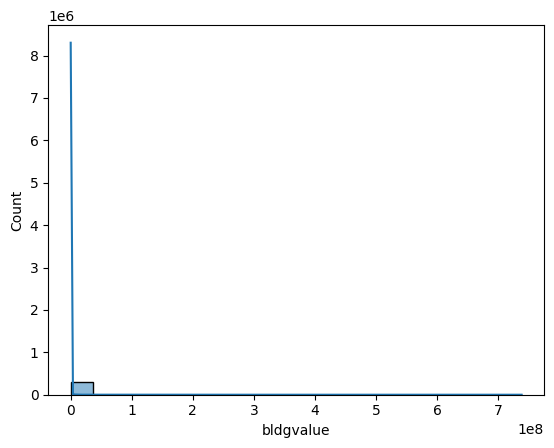

In [85]:
# Create histogram for 'bldgvalue' (not filtered by landclass)

sns.histplot(df_2['bldgvalue'], bins=20, kde=True)

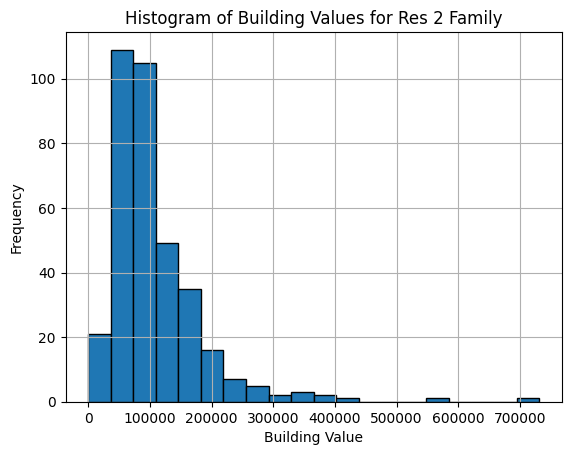

In [86]:
# Filter the DataFrame for 'Res  2 Family'
filt_bldgvalue_1 = df_2[df_2['landclass'] == 'Res  2 Family']

# Create the histogram
filt_bldgvalue_1['bldgvalue'].hist(bins=20, edgecolor='black')

# Customize the plot
plt.title('Histogram of Building Values for Res 2 Family')
plt.xlabel('Building Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

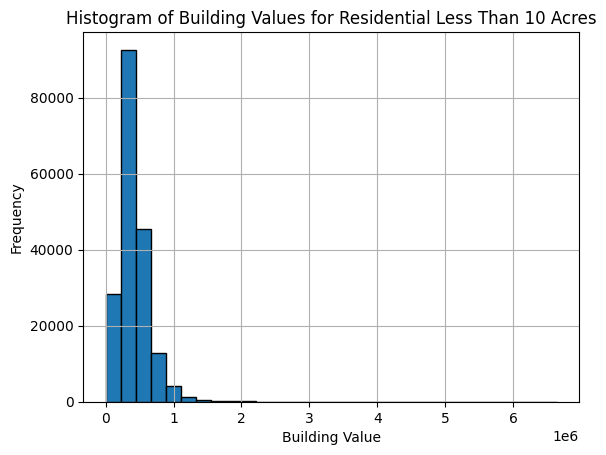

In [89]:
# Filter the DataFrame for 'Residential Less Than 10 Acres'
filt_bldgvalue_2 = df_2[df_2['landclass'] == 'Residential Less Than 10 Acres']

# Create the histogram
filt_bldgvalue_2['bldgvalue'].hist(bins=30, edgecolor='black')

# Customize the plot
plt.title('Histogram of Building Values for Residential Less Than 10 Acres')
plt.xlabel('Building Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

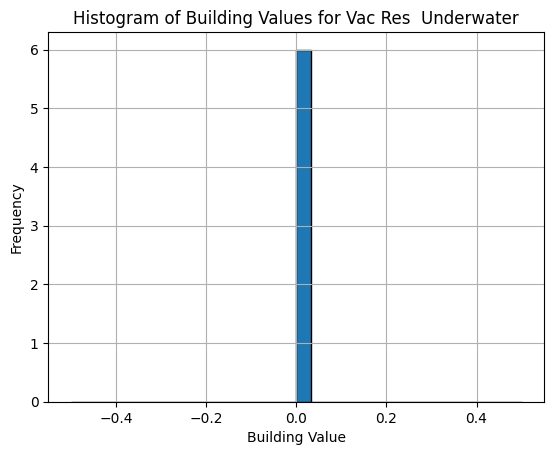

In [91]:
# Filter the DataFrame for 'Vac Res  Underwater'...very interesting residence...

filt_bldgvalue_3 = df_2[df_2['landclass'] == 'Vac Res  Underwater']

# Create the histogram
filt_bldgvalue_3['bldgvalue'].hist(bins=30, edgecolor='black')

# Customize the plot
plt.title('Histogram of Building Values for Vac Res  Underwater')
plt.xlabel('Building Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

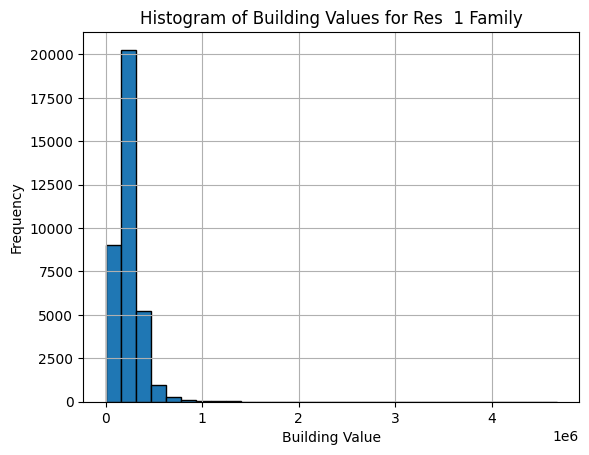

In [93]:
# Filter the DataFrame for 'Res  1 Family'

filt_bldgvalue_4 = df_2[df_2['landclass'] == 'Res  1 Family']

# Create the histogram
filt_bldgvalue_4['bldgvalue'].hist(bins=30, edgecolor='black')

# Customize the plot
plt.title('Histogram of Building Values for Res  1 Family')
plt.xlabel('Building Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

#### Investigate Lower Building Values

In [96]:
# Create a subset for 'Res  1 Family' that have building values lower than $50,000

res_1_fam_low = df_2[(df_2['landclass'] == 'Res  1 Family') & (df_2['bldgvalue'] < 50000)]
res_1_fam_low.head(5)

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
1583,2808 Historic Cir,0.07,Res 1 Family,NaN,NaN,KITTS CREEK/PH:03/LT#405 PT PL000192-000245,0,21974,21974,2014-04-29,21974,NaT,Durham,<NA>,Morrisville,27560,3176.993461,230.376117,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,b'\x01\x01\x00\x00\x00m\xce\xa7\xea\xd1\xb6S\x...,35.867447,-78.856562
1638,2700 Historic Cir,0.04,Res 1 Family,NaN,NaN,KITTS CREEK/PH:03/LT#397 PT PL000192-000245,0,20005,20005,2015-07-29,20005,NaT,Durham,<NA>,Morrisville,27560,1850.764817,172.108622,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x0c:b\x95\xbd\xb6S\xc0\...,35.867424,-78.855321
1654,2800 Historic Cir,0.05,Res 1 Family,NaN,NaN,KITTS CREEK/PH:03/LT#403 PT PL000192-000245,0,20612,20612,2015-11-12,20612,NaT,Durham,<NA>,Morrisville,27560,1972.432838,177.722102,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00E\xce\xccj\xcc\xb6S\xc0\...,35.867442,-78.856227
2080,507 Commonwealth St,0.12,Res 1 Family,NaN,NaN,PROP-WOODS LARKIN/LT#83 PL00005A-000005,48567,16860,16860,NaT,65427,NaT,Durham,932,Durham,27703,5432.227113,317.030420,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\xd6\xef(\x8b8\xb7S\xc0C...,35.971940,-78.862826
2085,506 East End Ave,0.06,Res 1 Family,NaN,NaN,PROP-KOI BUILDERS LLC/LT#03 PL000206-000061,0,16515,16515,NaT,16515,2021-01-29,Durham,<NA>,Durham,27703,2443.047222,203.938181,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x03\x7f\x1a;o\xb7S\xc0\...,35.974766,-78.866164


#### Check TotalSaleValue Histogram for Res  1 Family

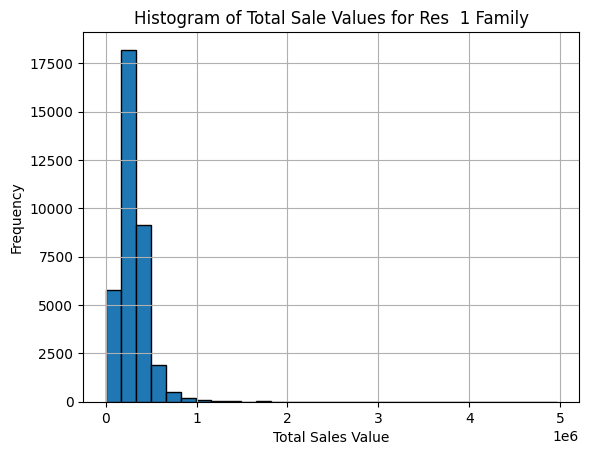

In [99]:
# Filter the DataFrame for 'Res  1 Family'

filt_ttlvalue_1 = df_2[df_2['landclass'] == 'Res  1 Family']

# Create the histogram
filt_ttlvalue_1['totalsalevalue'].hist(bins=30, edgecolor='black')

# Customize the plot
plt.title('Histogram of Total Sale Values for Res  1 Family')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [101]:
# Create a subset for 'Res  1 Family' that have total sale values lower than $10,000 ($0 was first evaluated, but no data)

res_1_fam_zero = df_2[(df_2['landclass'] == 'Res  1 Family') & (df_2['totalsalevalue'] < 10000)]
res_1_fam_zero

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
8285,1433 Bowhall Dr,2.58,Res 1 Family,NaN,NaN,SWEETBRIER/PH:1/OPEN SPACE#4 PL209-238,0,1,1,NaT,1,NaT,Durham,<NA>,Durham,27703,1.124049e+05,1623.787596,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x19\x00...,b'\x01\x01\x00\x00\x00\x10\xcb\x9a4\xec\xb1S\x...,35.953043,-78.780042
8593,1430 Bowhall Dr,2.68,Res 1 Family,NaN,NaN,SWEETBRIER/PH:1/OPEN SPACE#3 PL209-238,0,1,1,NaT,1,NaT,Durham,<NA>,Durham,27703,1.167345e+05,1698.077481,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00'\x00\x0...",b'\x01\x01\x00\x00\x00\x8c\xc9G2\xde\xb1S\xc0R...,35.952136,-78.779187
18519,204 Colvard Park Dr,0.61,Res 1 Family,NaN,NaN,COLVARD FARMS/PH:03/LT#88 PL002004-000055,0,1,1,NaT,1,NaT,Durham,<NA>,Durham,27713,2.311296e+03,307.439506,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,b'\x01\x01\x00\x00\x00\xd7\x162\x87\xa2\xbdS\x...,35.865624,-78.963045
26277,306 Highview Dr,0.00,Res 1 Family,NaN,NaN,COLONY WOODS/SEC:03/PH:05/LT#17 PT PL000066-00...,0,130,130,2014-01-01,130,NaT,Durham,<NA>,Chapel Hill,27517,3.056612e+01,39.559852,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00...",b'\x01\x01\x00\x00\x00\x03\x81\xec\xc08\xc0S\x...,35.936994,-79.003464
26327,406 Highview Dr,0.04,Res 1 Family,NaN,NaN,COLONY WOODS/SEC:03/PH:04/LT#99 PT PL000064-00...,0,7204,7204,2018-07-02,7204,NaT,Durham,<NA>,Chapel Hill,27517,1.758421e+03,218.732305,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,b'\x01\x01\x00\x00\x00\x13\x03\x15k<\xc0S\xc0\...,35.935533,-79.003688
26339,311 Meadowmont Ln,0.02,Res 1 Family,NaN,NaN,MEADOWMONT/PH:02/LT#276R PT PL000157-000193,0,7090,7090,2016-07-28,7090,NaT,Durham,<NA>,Chapel Hill,27517,9.117703e+02,220.733211,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,b'\x01\x01\x00\x00\x00X\xb5\xfb\x01\x87\xc0S\x...,35.909485,-79.008240
56619,4217 Sweet Ivy Landing,0.38,Res 1 Family,NaN,NaN,SWEETBRIER/PH:1/FUTURE PHASE 2 PL209-235,0,9500,9500,NaT,9500,NaT,Durham,<NA>,Durham,27703,1.663065e+04,505.370002,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x1a\x00...,b'\x01\x01\x00\x00\x00\xc1f\xce\r\xf9\xb1S\xc0...,35.955605,-78.780826
70072,1908 White Plains Rd,0.00,Res 1 Family,NaN,NaN,COLONY WOODS EAST/SEC:03/PH:03/LT#184 PT PL000...,0,580,580,2014-01-01,580,NaT,Durham,<NA>,Chapel Hill,27517,1.390207e+02,65.711327,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00...",b'\x01\x01\x00\x00\x00!\x95\x8bhE\xc0S\xc0\xea...,35.932518,-79.004236
136848,2019 Mangum Ct,9.71,Res 1 Family,NaN,NaN,PROP-MERRITT LYNN MANGUM/ TRCT#B CNTY DRHM-ORN...,0,1,1,2014-01-01,1,NaT,Durham,<NA>,Chapel Hill,27517,9.494625e+01,52.930490,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00...,b'\x01\x01\x00\x00\x00@\x88\x0c\xdd\xfb\xc0S\x...,35.868503,-79.015373
137007,408 Highview Dr,0.01,Res 1 Family,NaN,NaN,COLONY WOODS/SEC:03/PH:04/LT#100 PT PL000064-0...,0,1638,1638,2021-10-19,1638,NaT,Durham,<NA>,Chapel Hill,27517,4.129982e+02,143.303656,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x8e\xb5\xa9M=\xc0S\xc0\...,35.935340,-79.003742


#### Value Hypothesis

1. Observing some of the building values above, it seems that a better column to reverence would be the "totalsalevalue" as it appears to be a combination of the bldgvalue and landvalue. According to data source, this column reflects the total value of land and building when last sold. As this analysis intends to look deeper into residential real estate, this would be more pertinent to the research. 

2. More public properties (such as the airport) might have building or land value, but seem less likely to have the total sale value.

3. There are 2374 missing total sale values from the dataset, but if only residential properties are evaluated, this might help eliminate some of the missing values if the missing total sale values mostly apply to more public properties.

4. Breaking out 'Res  1 Family', as an example, has no '0' value, but some extremely low numbers--as low as $1. These are potentially values to eliminate from the evaluation. It's also been revealed that there are some "0 No Address" in the location column, so these could be removed.

## Remove Rows

#### No Address Rows

It was discovered from the above that there are "0 No Address" in the location column, so these will be removed from the entire dataset.

In [106]:
# Create subset for No Address rows and check shape

no_add = df_2[df_2['location'] == '0 No Address']
no_add.shape

(165, 23)

In [108]:
# Remove "0 No Address" from dataset and create new dataframe

df_3 = df_2.drop(no_add.index)
df_3.shape #check shape, confirming that 165 rows have been removed

(294226, 23)

#### Missing Total Sale Value Rows

In [111]:
# Check number of missing values in totalsalevalue (total missing reduced by 89 after "0 No Address" was removed

df_3['totalsalevalue'].isna().sum()

2289

In [113]:
# Create subset of missing total sale values

ttl_value_zero = df_3[df_3['totalsalevalue'].isna()]
ttl_value_zero.head(3)

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
2074,301 Taft St,0.51,Res 1 Family,NaN,NaN,PROP-BRIGGS ERNEST/LT#B PL000027-000049,<NA>,<NA>,<NA>,NaT,<NA>,2021-11-12,Durham,768,Durham,27703,22090.928923,630.855529,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...",b'\x01\x01\x00\x00\x00\xe0W1\xe9\xd2\xb6S\xc0~...,35.982869,-78.856623
7595,637 Davis Dr,2.64,Vacant Industrial,NaN,NaN,KEYSTONE TECHNOLOGY PARK/TR#11-12 PT PL000149-...,<NA>,<NA>,<NA>,NaT,<NA>,NaT,Durham,<NA>,Morrisville,27560,114869.348022,2103.419061,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...,"b'\x01\x01\x00\x00\x00,\xf2\xe1\x80%\xb7S\xc0\...",35.867633,-78.861664
7641,525 Kings Lake Way,0.13,Vac Res Lot Sml Tra,NaN,NaN,ASHTON CROSSING/PH:02/LT#08 PL209-90,<NA>,<NA>,<NA>,NaT,<NA>,2023-11-20,Durham,3512,Durham,27703,5825.834464,322.469113,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,b'\x01\x01\x00\x00\x00\xe4\xa3\xc9\x8fY\xb5S\x...,35.957712,-78.833591


In [115]:
# Check property types that have no Total Sale Value

ttl_value_zero['landclass'].unique()

array(['Res  1 Family', 'Vacant Industrial', 'Vac Res  Lot Sml Tra',
       'Res Twnh W  Land', 'Vac Res  Developer', 'Com  Restaurants',
       'Res  Mobile Home', 'Vacant Commercial', 'Vac Res  Rural < 10',
       'Res  2 Family', 'Vac Ag  10 Acres Or', 'Res  Residential (Un',
       'Present Use Forestry', 'Vacant Land (Undiff)',
       'Cmnty Svc Church Prk', 'Vac Developer Utilit',
       'Vac Ag  Other Rural', 'Com  Office Bldg', 'Vac Res  < 10 Acres',
       None, 'Ag  1 Family', 'Com  Apt Garden', 'Res  3 Family',
       'Cmnty Svc  College', 'Vac Com  Developer', 'Vacres Lt Smltr Rear',
       'Vacres Lt Smltr Side', 'Vac Res  W  Sml Impr',
       'Res  Rural Residenti', 'Com  Office Condo', 'Com  Whse Storage',
       'Vacant', 'Com  Multi Use Capab', 'Com  Commercial (Und',
       'Com  Gas Fuel Oil St', 'Vac Comm Svc  Grvl P',
       'Vacant Community Ser', 'Com  Multi Use Condo',
       'Ind  Biotech   Bioph', 'Com  1 Sty Sm Sgl Us',
       'Ind  Misc Research', 'Unk Lease

In [117]:
# Calculate percentage of no total sale value out of entire dataframe

f"{((len(ttl_value_zero['landclass']) / len(df_3)) * 100): .2f}%"

' 0.78%'

#### Missing Total Sale Value Notes

1. Since the landclass of missing total sale values span a wide array of categories, and because this only represents 0.78% of the entire dataframe, it might be worthwhile just to eliminate these rows altogether.

2. As can be seen from the data subset 'ttl_value_zero", there isn't a lot of extra information on these rows either, aside from the geo location and landclass. This is a second reason to eliminate from the analysis, rather than impute random values.

In [120]:
# Remove Total Sale Value rows with no value from dataset and create new dataframe

df_4 = df_3.drop(ttl_value_zero.index)
df_4.shape #check shape, confirming that 2289 rows have been removed

(291937, 23)

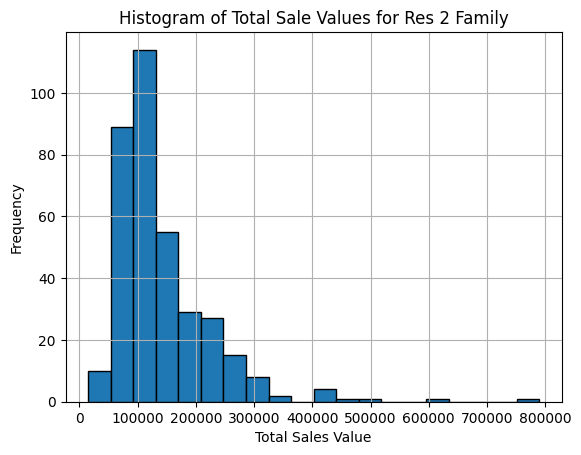

In [122]:
# Filter the DataFrame for 'Res  2 Family'
filt_ttlvalue_2 = df_4[df_4['landclass'] == 'Res  2 Family']

# Create the histogram
filt_ttlvalue_2['totalsalevalue'].hist(bins=20, edgecolor='black')

# Customize the plot
plt.title('Histogram of Total Sale Values for Res 2 Family')
plt.xlabel('Total Sales Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [124]:
res_2_fam = df_4[(df_4['landclass'] == 'Res  2 Family') & (df_4['totalsalevalue'] < 50000)]
res_2_fam

,location,deedacres,landclass,totalstructures,totalunits,propertydesc,bldgvalue,landvalue,landsalevalue,landsaledate,totalsalevalue,totalsaledate,county,totalbldgsqft,phycity,phyzip,shape_starea,shape_stlength,yearbuilt,geo_shape,geo_point_2d,latitude,longitude
8395,503 Linwood Ave,0.06,Res 2 Family,NaN,NaN,PROP-1223 FAYETTEVILLE ST/LT#02 PL209-89,0,15028,15028,NaT,15028,NaT,Durham,<NA>,Durham,27701,2742.397483,209.696228,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\xde\xc1\xaf\r\x85\xb9S\...,35.981333,-78.898746
54544,1615 Fayetteville St,0.17,Res 2 Family,NaN,NaN,STOKESDALE/BLK:A/LT#15 FAYETTEVILLE ST/HD PL00...,20007,23420,23420,NaT,43427,NaT,Durham,1374,Durham,27707,7444.254265,398.907225,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x001\xf7\xac\x9d\x9b\xb9S\x...,35.977831,-78.900123
147750,1100 Jacob St,0.14,Res 2 Family,NaN,NaN,PROP-HARRIS B W/LT#05 PL00005B-000153,26969,22780,22780,NaT,49749,2016-05-05,Durham,1120,Durham,27701,6050.163580,381.600044,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x00\xaf\xd5\x8b!\xb9S\x...,35.980388,-78.892672
227959,800 Colfax St,0.09,Res 2 Family,NaN,NaN,PROP-AVERY W H/LT#01 PT PL000017-000194,24326,21760,21760,NaT,46086,NaT,Durham,960,Durham,27701,4909.145221,307.922224,NaT,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...",b'\x01\x01\x00\x00\x00\xd4\xdc\x0bl.\xb9S\xc0G...,35.981733,-78.893458
241194,804 Simmons St,0.15,Res 2 Family,NaN,NaN,PROP-COLEMAN RONALD & MEL VIN GEORGE PL000000-...,27038,22880,22880,NaT,49918,2021-08-31,Durham,1120,Durham,27701,6343.251082,353.542590,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,b'\x01\x01\x00\x00\x00\x82\xe3\x81\rF\xb9S\xc0...,35.981760,-78.894901
288803,910 Price Ave,0.20,Res 2 Family,NaN,NaN,PROP-WILKERSON J L/LT#05 PL000025-000038,17367,24020,24020,NaT,41387,NaT,Durham,1230,Durham,27701,8756.140755,450.089645,NaT,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x06\x00...,"b'\x01\x01\x00\x00\x00R\xf4\x16\x81,\xb9S\xc0Y...",35.977816,-78.893341


In [126]:
# Change res_2_fam to have only home values above $40,000 since the only value under this amount only accounts for the land value

res_2_fam = df_4[(df_4['landclass'] == 'Res  2 Family') & (df_4['totalsalevalue'] > 40000)]
res_2_fam.shape

(356, 23)

In [128]:
# Checking for nulls in res_2_fam

res_2_fam.isna().sum()

location             0
deedacres            0
landclass            0
totalstructures    356
totalunits         356
propertydesc         0
bldgvalue            0
landvalue            0
landsalevalue        0
landsaledate       351
totalsalevalue       0
totalsaledate      123
county               0
totalbldgsqft        1
phycity              1
phyzip               0
shape_starea         0
shape_stlength       0
yearbuilt          356
geo_shape            0
geo_point_2d         0
latitude             0
longitude            0
dtype: int64

# 05. Plotting Choropleth

#### 1. Prepare Total Sales by Zip Data

For the purpose of this choropleth, the analysis will look at Total Sales by 'Res  2 Family' Properties

In [132]:
# Create a data frame with just the location and the total sale value for plotting

data_to_plot = res_2_fam[['phyzip','totalsalevalue']]
data_to_plot

,phyzip,totalsalevalue
225,27701,88017
8265,27701,111343
28485,27703,181215
28803,27713,209324
53766,27707,216492
...,...,...
289150,27703,174181
289153,27707,119112
289162,27707,186060
289220,27707,238424


In [134]:
# Aggregate total sales per ZIP code 
sales_by_zip = data_to_plot.groupby('phyzip', as_index=False)['totalsalevalue'].sum()

# Convert ZIP codes to strings 
sales_by_zip['phyzip'] = sales_by_zip['phyzip'].astype(str).str.zfill(5)

In [136]:
sales_by_zip

,phyzip,totalsalevalue
0,00000,249537
1,27517,478399
2,27701,6846966
3,27703,6653600
4,27705,238068
5,27707,35608086
6,27713,854622


In [138]:
# Remove '00000'

sales_by_zip = sales_by_zip[sales_by_zip['phyzip'] != '00000']
sales_by_zip

,phyzip,totalsalevalue
1,27517,478399
2,27701,6846966
3,27703,6653600
4,27705,238068
5,27707,35608086
6,27713,854622


#### 2. Merge Sales Data with ZCTA Geometries

In [141]:
# Rename the ZIP code column to match your sales data 

zcta_gdf = zcta_gdf.rename(columns={'ZCTA5CE20': 'phyzip'})

In [143]:
# Merge sales data with ZCTA geometries

final_gdf = zcta_gdf.merge(sales_by_zip, on='phyzip', how='inner')

In [155]:
final_gdf.head(1)

,phyzip,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,totalsalevalue
0,27517,27517,860Z200US27517,B5,G6350,S,119171645,10839582,+35.8426629,-079.0320148,"POLYGON ((-79.09384 35.80569, -79.09378 35.805...",478399


#### 3. Ensure Correct Coordinate System

In [146]:
if final_gdf.crs != 'EPSG:4326':
    final_gdf = final_gdf.to_crs(epsg=4326)

#### 4. Plot the Choropleth w/ Folium

In [149]:
# Create a base map centered on NC

m = folium.Map(location=[35.5, -79.5], zoom_start=7, tiles='CartoDB positron')

In [151]:
# Add choropleth layer
folium.Choropleth(
    geo_data=final_gdf,
    name='choropleth',
    data=final_gdf,
    columns=['phyzip', 'totalsalevalue'],
    key_on='feature.properties.phyzip',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sale Value (USD)',
    highlight=True
).add_to(m)

# Add tooltips
folium.features.GeoJson(
    final_gdf,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['phyzip', 'totalsalevalue'],
        aliases=['ZIP Code:', 'Total Sales:'],
        localize=True
    )
).add_to(m)

# Display the map
m

In [699]:
# Save the map as an HTML file

m.save("/home/0668a905-109d-4403-be59-0a04abf51dd9/Cary Real Estate Analysis/03 Analysis/01 Maps/res_2_fam_ttlsales_choro_map.html")

#### Final Thoughts on Choropleth

1. The total sale value for "Res  2 Family" homes was not quite where I anticipated--I thought there would be higher sales focused around the area of Cary, NC. I will be curious to see how the other landclass groupings compare once I evaluated each by zip code.

2. It would be nice to get some clarification on what exactly some of the landclass groupings mean--does "Res  2 Family" mean that two different families occupy a property? Such as a duplex? Maybe the data source can provide more information.

# 06. Export Cleaned & Wrangled Dataset

In [713]:
#### Export cleaned df_4 data into the Prepared Data folder

df_4.to_parquet(os.path.join(path, '01 Datasets','02 Prepared Data', 'cary_cleaned_wrangled.parquet'), compression = 'snappy')